In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import cross_validate

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, plot_confusion_matrix

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

# Import Data and EDA

In [2]:
df= pd.read_csv("/Users/allisongao/Dropbox/Flatiron/Phase 4/NLP_project/NLP Data.csv", encoding='latin1')

In [3]:
df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [4]:
df["target"] = df["is_there_an_emotion_directed_at_a_brand_or_product"]
df["text"] = df["tweet_text"]
df.drop("is_there_an_emotion_directed_at_a_brand_or_product", axis = 1, inplace=True)
df.drop("tweet_text", axis = 1, inplace=True)
df

,emotion_in_tweet_is_directed_at,target,text
0,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...
...,...,...,...
9088,iPad,Positive emotion,Ipad everywhere. #SXSW {link}
9089,NaN,No emotion toward brand or product,"Wave, buzz... RT @mention We interrupt your re..."
9090,NaN,No emotion toward brand or product,"Google's Zeiger, a physician never reported po..."
9091,NaN,No emotion toward brand or product,Some Verizon iPhone customers complained their...


In [5]:
df["emotion_in_tweet_is_directed_at"]

0                   iPhone
1       iPad or iPhone App
2                     iPad
3       iPad or iPhone App
4                   Google
               ...        
9088                  iPad
9089                   NaN
9090                   NaN
9091                   NaN
9092                   NaN
Name: emotion_in_tweet_is_directed_at, Length: 9093, dtype: object

In [6]:
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].map(
    
                                                                         {'iPad': "Apple", 
                                                                         'Apple': "Apple",
                                                                         'iPad or iPhone App ': "Apple",
                                                                         'Google ': "Google",
                                                                         'iPhone': "Apple",
                                                                         'Other Google product or service ': "Google",
                                                                         'Android App ': "Google",
                                                                         'Android': "Google",
                                                                         "Other Apple product or service": "Apple",
                                                                         "NaN": "Unknown"
                                                                         })

In [7]:
df['emotion_in_tweet_is_directed_at'].fillna('Unknown', inplace=True)

In [8]:
df['emotion_in_tweet_is_directed_at'].value_counts()

Unknown    7076
Apple      1939
Google       78
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [9]:
df.drop_duplicates(inplace=True)
df.dropna(subset = ["text"], inplace=True)

In [10]:
df["target"].value_counts()

No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: target, dtype: int64

In [11]:
df.head()

,emotion_in_tweet_is_directed_at,target,text
0,Apple,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,Unknown,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,Apple,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,Unknown,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,Unknown,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


In [12]:
graph1 = pd.DataFrame(df.groupby(['emotion_in_tweet_is_directed_at','target'], as_index = False).size())
graph1

,emotion_in_tweet_is_directed_at,target,size
0,Apple,I can't tell,7
1,Apple,Negative emotion,324
2,Apple,No emotion toward brand or product,55
3,Apple,Positive emotion,1549
4,Google,Negative emotion,8
5,Google,No emotion toward brand or product,1
6,Google,Positive emotion,68
7,Unknown,I can't tell,149
8,Unknown,Negative emotion,237
9,Unknown,No emotion toward brand or product,5319


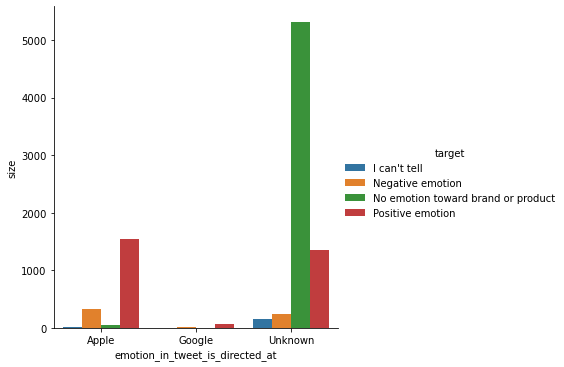

In [13]:
sns.catplot(x="emotion_in_tweet_is_directed_at", y="size", hue="target", kind="bar", data=graph1)

In [14]:
graph2 = pd.DataFrame(df.groupby(['target','emotion_in_tweet_is_directed_at'], as_index = False).size())
graph2

,target,emotion_in_tweet_is_directed_at,size
0,I can't tell,Apple,7
1,I can't tell,Unknown,149
2,Negative emotion,Apple,324
3,Negative emotion,Google,8
4,Negative emotion,Unknown,237
5,No emotion toward brand or product,Apple,55
6,No emotion toward brand or product,Google,1
7,No emotion toward brand or product,Unknown,5319
8,Positive emotion,Apple,1549
9,Positive emotion,Google,68


<Figure size 7200x3600 with 0 Axes>

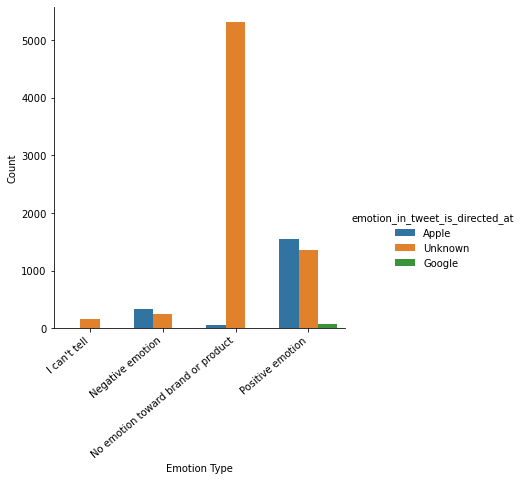

In [15]:
plt.figure(figsize=(100,50))
by_target_type = sns.catplot(x="target", y="size", hue="emotion_in_tweet_is_directed_at", kind="bar", data=graph2)
by_target_type.set(xlabel='Emotion Type', ylabel='Count')
by_target_type.set_xticklabels(rotation=40, ha="right")
plt.show()

<Figure size 11520x5760 with 0 Axes>

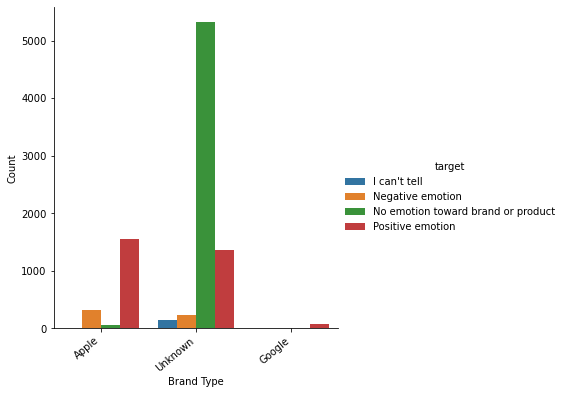

In [16]:
plt.figure(figsize = (160,80))
by_brand_type = sns.catplot(x="emotion_in_tweet_is_directed_at", y="size", hue="target", kind="bar", data=graph2)
by_brand_type.set(xlabel='Brand Type', ylabel='Count')
by_brand_type.set_xticklabels(rotation=40, ha="right")
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

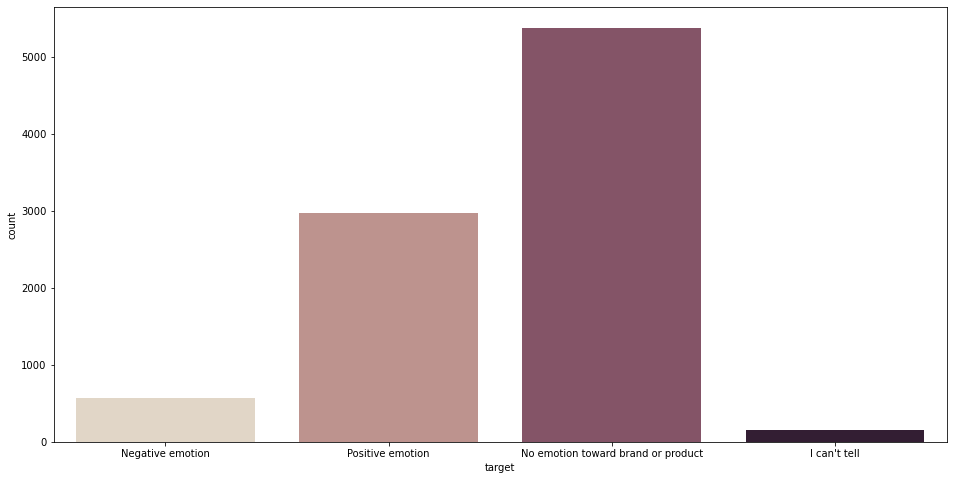

In [17]:
plt.figure(figsize = (16,8))
sns.countplot(x="target", palette="ch:.25", data=df)

# Split Data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df["text"],
                                                    df["target"],
                                                    random_state=42,
                                                    stratify = df["target"])

In [19]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [20]:
df_train["target"].value_counts()

No emotion toward brand or product    4031
Positive emotion                      2227
Negative emotion                       427
I can't tell                           117
Name: target, dtype: int64

# model 1 - baseline Model

In [21]:
def drop_unidentified(df):
    '''
    Drop rows from DataFrame wehre the target is "I can't tell".
    
    '''
    
    df.drop(df.loc[df["target"] == "I can't tell"].index, inplace=True)
    
    return df 

In [22]:
def label(df):
    
    
    df['target'] = df['target'].map({'No emotion toward brand or product': 0, 
                                                                         'Negative emotion': 1,
                                                                         'Positive emotion': 2,
                                                                         })
    
    return df

In [23]:
cleaning_pipeline = Pipeline(steps=[
    
    ("drop", FunctionTransformer(drop_unidentified)),
    ("label", FunctionTransformer(label))  
    
])

In [24]:
df_train_clean = cleaning_pipeline.fit_transform(df_train)
df_test_clean= cleaning_pipeline.transform(df_test)

In [29]:
sw = stopwords.words('english')


fsm_pipe = Pipeline([('cv', CountVectorizer(stop_words=sw)),
                     ('mnb', MultinomialNB())
])


fsm_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('cv',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('mnb', MultinomialNB())])

In [30]:
y_hat = fsm_pipe.predict(df_train_clean['text'])
accuracy_score = accuracy_score(df_train_clean['target'], y_hat)
print('Accuracy Score: {}'.format(accuracy_score))

TypeError: 'numpy.float64' object is not callable

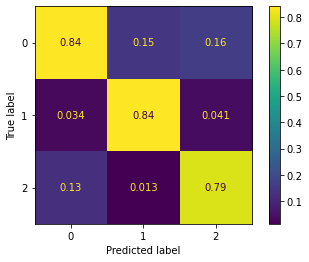

In [31]:
confusion_matrix(df_train_clean['target'], y_hat)
plot_confusion_matrix(fsm_pipe, df_train_clean['text'], df_train_clean['target'], normalize = "pred");

In [32]:
def print_cv_scores(pipe, X, y):
    '''
    Runs cross_validate on given feature and multiclass target arrays using given pipeline, 
    printing the scoring results for both training and cross_val.
    '''
    scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']
    
    results = cross_validate(pipe, X, 
                                   y, 
                                   return_train_score=True, scoring=scoring)
    
    print(results['train_accuracy'])
    print('Training Accuracy', results['train_accuracy'].mean())
    print('##############')
    print(results['test_accuracy'])
    print('Cross_Val Accuracy', results['test_accuracy'].mean())
    print('##############')
    print('Training Macro Precision:', results['train_precision_macro'].mean())
    print('Cross_Val Macro Precision:', results['test_precision_macro'].mean())
    print('##############')
    print('Training Macro Recall:', results['train_recall_macro'].mean())
    print('Cross_Val Macro Recall:', results['test_recall_macro'].mean())
    print('##############')
    print('Training Macro F1:', results['train_f1_macro'].mean())
    print('Cross_Val Macro F1:', results['test_f1_macro'].mean())

In [33]:
print_cv_scores(fsm_pipe, df_train_clean["text"], df_train_clean['target'])

[0.83246073 0.82834705 0.83807031 0.83451758 0.83769634]
Training Accuracy 0.8342183994016455
##############
[0.66791324 0.65295438 0.69334331 0.68511593 0.64697083]
Cross_Val Accuracy 0.6692595362752431
##############
Training Macro Precision: 0.8434175210453303
Cross_Val Macro Precision: 0.6528123538208142
##############
Training Macro Recall: 0.7076100950650448
Cross_Val Macro Recall: 0.4842001160528876
##############
Training Macro F1: 0.7511779766750047
Cross_Val Macro F1: 0.5029316530646247


# model 2 - mnb and using tfidf

In [34]:
vec = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=sw)
vec.fit_transform(df_train_clean['text'])
vec.vocabulary_

{'want': 7731,
 'one': 4883,
 'rumor': 5996,
 'apple': 308,
 'opening': 4907,
 'temporary': 7079,
 'store': 6735,
 'downtown': 2036,
 'austin': 448,
 'sxsw': 6906,
 'ipad': 3664,
 'launch': 3953,
 'link': 4074,
 'aapl': 0,
 'already': 196,
 'big': 682,
 'winner': 7866,
 'mention': 4396,
 "google's": 2982,
 'disavowal': 1909,
 'planned': 5243,
 'part': 5047,
 'presentation': 5414,
 'good': 2975,
 'thing': 7154,
 'crashing': 1575,
 'instead': 3596,
 'works': 7922,
 'best': 665,
 'iphone': 3669,
 'android': 243,
 'sold': 6514,
 'went': 7804,
 'new': 4709,
 'buyers': 958,
 'wow': 7941,
 'via': 7629,
 'yesterday': 8011,
 'listened': 4086,
 'marissa': 4288,
 'mayer': 4341,
 'discuss': 1923,
 'mobile': 4513,
 'technologies': 7057,
 'users': 7565,
 'use': 7560,
 'maps': 4277,
 'phones': 5170,
 'nothing': 4786,
 'quite': 5604,
 'like': 4057,
 'make': 4245,
 'desperately': 1825,
 'almost': 189,
 'drooling': 2064,
 "guy's": 3107,
 'next': 4726,
 'everyone': 2344,
 'buy': 956,
 'app': 298,
 'day':

In [35]:
pipeline
fit the pipeline
print_cv_scores 
plot_confusion_score

SyntaxError: invalid syntax (<ipython-input-35-e8d37495e0d5>, line 2)

In [36]:
sw = stopwords.words('english')


model2_pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words=sw)),
                     ('mnb', MultinomialNB())
])


model2_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('mnb', MultinomialNB())])

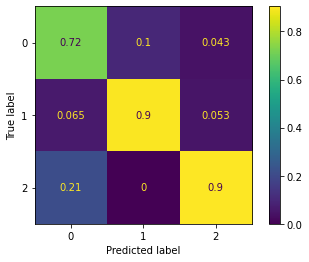

In [162]:
confusion_matrix(df_train_clean['target'], y_hat)
plot_confusion_matrix(model2_pipe, df_train_clean['text'], df_train_clean['target'], normalize = "pred");

In [163]:
print_cv_scores(model2_pipe, df_train_clean['text'], df_train_clean['target'])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.7578534  0.75317876 0.74831713 0.74850411 0.76271503]
Training Accuracy 0.7541136873597607
##############
[0.64547494 0.65295438 0.66342558 0.66043381 0.64697083]
Cross_Val Accuracy 0.6538519072550486
##############
Training Macro Precision: 0.8785256264483937
Cross_Val Macro Precision: 0.45402555592046906
##############
Training Macro Recall: 0.49072138146803973
Cross_Val Macro Recall: 0.3958110807053479
##############
Training Macro F1: 0.4931023607640201
Cross_Val Macro F1: 0.3733941200907602


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# model 3 - just like model 2 but using smote

In [172]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipe

In [174]:
mnb_pipe_smote = imbpipe([
                     ('tfidf', TfidfVectorizer(stop_words=sw)),
                     ('smote', SMOTE(random_state=42)),
                     ('mnb', MultinomialNB())
])


mnb_pipe_smote.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('smote', SMOTE(random_state=42)), ('mnb', MultinomialNB())])

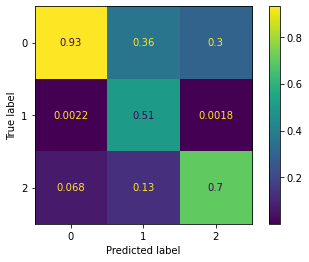

In [175]:
confusion_matrix(df_train_clean['target'], y_hat)
plot_confusion_matrix(mnb_pipe_smote, df_train_clean['text'], df_train_clean['target'], normalize = "pred");

In [177]:
print_cv_scores(mnb_pipe_smote, df_train_clean['text'], df_train_clean['target'])

[0.80179506 0.79693343 0.79805535 0.79356769 0.79618549]
Training Accuracy 0.7973074046372476
##############
[0.59685864 0.57741212 0.61032162 0.62378459 0.55946148]
Cross_Val Accuracy 0.593567688855647
##############
Training Macro Precision: 0.721952478755176
Cross_Val Macro Precision: 0.5140018000336204
##############
Training Macro Recall: 0.8588563291546129
Cross_Val Macro Recall: 0.5859285060891916
##############
Training Macro F1: 0.7610232125599717
Cross_Val Macro F1: 0.5265757925196674


# model 4 - random forest 

In [40]:
RF_pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words=sw)),
                     ('rf', RandomForestClassifier(class_weight="balanced"))
])


RF_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('rf', RandomForestClassifier(class_weight='balanced'))])

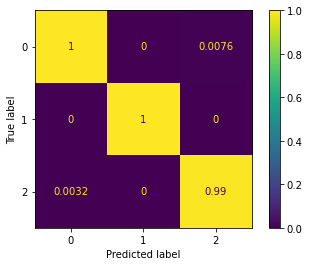

In [202]:
confusion_matrix(df_train_clean['target'], y_hat)
plot_confusion_matrix(RF_pipe, df_train_clean['text'], df_train_clean['target'], normalize = "pred");

In [203]:
print_cv_scores(RF_pipe, df_train_clean['text'], df_train_clean['target'])

[0.99588631 0.99663426 0.99644727 0.99644727 0.99588631]
Training Accuracy 0.9962602842183994
##############
[0.6671653  0.66043381 0.69409125 0.68960359 0.644727  ]
Cross_Val Accuracy 0.6712041884816753
##############
Training Macro Precision: 0.9967716120127552
Cross_Val Macro Precision: 0.69251970720921
##############
Training Macro Recall: 0.9974303565331242
Cross_Val Macro Recall: 0.4806376101859363
##############
Training Macro F1: 0.9970983624996922
Cross_Val Macro F1: 0.5088798541315013


In [ ]:
X = RF_pipe[0].vocabulary_

df = X.items()
df_list = list(df)
df_df = pd. DataFrame(df_list )
df_df.sort_values(by = 1, ascending = False)

In [260]:
from sklearn.model_selection import GridSearchCV

grid = {
        "tfidf__max_df" : [0.7, 0.8, 0.9],
        
        "tfidf__min_df" : [0.1, 0.15, 0.2],
    
        "tfidf__ngram_range" : [(1,1), (1,2),(2,2)],
    
        "rf__class_weight" : ['balanced', 'balanced_subsample'],
    
        "rf__n_estimators": [25, 50, 100], 
        
        "rf__max_depth" : [10, 15, 20], 
        
        "rf__min_samples_leaf" : [1, 2, 3]
       
       
       }

gridsearch = GridSearchCV(RF_pipe, grid, cv=3, return_train_score=True, verbose=2) 

gridsearch.fit(df_train_clean['text'], df_train_clean['target'])

gridsearch.best_params_

Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_w

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   2.1s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   2.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   3.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.9s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balance

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.7s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=ba

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balan

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=b

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balan

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanc

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   3.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   2.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   2.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   2.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   3.2s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=bal

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balance

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.5s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=ba

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.2s
[CV] END rf__class_weight=bal

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanc

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   2.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.7s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.5s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balan

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.7s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.7s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balan

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.5s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   1.4s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.5s
[CV] END rf__class_weight=b

{'rf__class_weight': 'balanced',
 'rf__max_depth': 20,
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 25,
 'tfidf__max_df': 0.9,
 'tfidf__min_df': 0.1,
 'tfidf__ngram_range': (1, 1)}

In [263]:
print('Mean Test Score: {}'.format(gridsearch.cv_results_['mean_test_score'].mean())) 
print('Mean Train Score: {}'.format(gridsearch.cv_results_['mean_train_score'].mean()))

Mean Test Score: 0.3553014241815987
Mean Train Score: 0.3881764521811537


In [265]:
from sklearn.model_selection import GridSearchCV

grid = {
        "tfidf__max_df" : [0.9, 0.95, 0.98],
        
        "tfidf__min_df" : [0.1, 0.05, 0.15],
    
        "tfidf__ngram_range" : [(1,1), (1,2)],
    
        "rf__class_weight" : ['balanced'],
    
        "rf__n_estimators": [25, 50, 100], 
        
        "rf__max_depth" : [10, 15, 20], 
        
        "rf__min_samples_leaf" : [1, 2, 3]
       
       
       }

gridsearch = GridSearchCV(RF_pipe, grid, cv=3, return_train_score=True, verbose=2) 

gridsearch.fit(df_train_clean['text'], df_train_clean['target'])

gridsearch.best_params_

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_we

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.95, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.95, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.95, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.95, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.95, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   2.1s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.9s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   1.9s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.05, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.98, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.98, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=

{'rf__class_weight': 'balanced',
 'rf__max_depth': 20,
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 25,
 'tfidf__max_df': 0.98,
 'tfidf__min_df': 0.05,
 'tfidf__ngram_range': (1, 1)}

In [267]:
print('Mean Test Score: {}'.format(gridsearch.cv_results_['mean_test_score'].mean())) 
print('Mean Train Score: {}'.format(gridsearch.cv_results_['mean_train_score'].mean()))

Mean Test Score: 0.445974994145817
Mean Train Score: 0.5246200593022828


In [41]:
from sklearn.model_selection import GridSearchCV

grid = {"tfidf__ngram_range" : [(1,1), (1,2)],
    
        "rf__n_estimators": [25, 50, 100], 
        
        "rf__max_depth" : [10, 15, 20], 
        
        "rf__min_samples_leaf" : [1, 2, 3]
       
       
       }

gridsearch = GridSearchCV(RF_pipe, grid, cv=3, return_train_score=True, verbose=2) 

gridsearch.fit(df_train_clean['text'], df_train_clean['target'])

gridsearch.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__ngram_range=(1, 1); total time=   0.1s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__ngram_range=(1, 1); total time=   0.1s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__ngram_range=(1, 1); total time=  

[CV] END rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__max_depth=15, rf__min_samples_leaf=2, rf

[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__max_depth=20, rf__min_samples_leaf=3, 

{'rf__max_depth': 20,
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 100,
 'tfidf__ngram_range': (1, 1)}

In [42]:
print('Mean Test Score: {}'.format(gridsearch.cv_results_['mean_test_score'].mean())) 
print('Mean Train Score: {}'.format(gridsearch.cv_results_['mean_train_score'].mean()))

Mean Test Score: 0.5661249533924523
Mean Train Score: 0.6515354142252108


In [43]:
from sklearn.model_selection import GridSearchCV

grid = {
        "tfidf__max_features" : [5000, None],
    
        "rf__n_estimators": [25, 50, 100], 
        
        "rf__max_depth" : [10, 15, 20], 
        
        "rf__min_samples_leaf" : [1, 2, 3]
       
       
       }

gridsearch = GridSearchCV(RF_pipe, grid, cv=3, return_train_score=True, verbose=2) 

gridsearch.fit(df_train_clean['text'], df_train_clean['target'])

gridsearch.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_features=5000; total time=   0.2s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_features=5000; total time=   0.2s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_features=5000; total time=   0.2s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_features=None; total time=   0.2s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_features=None; total time=   0.2s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_features=None; total time=   0.2s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_features=5000; total time=   0.2s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_features=5000; total time=   0.2s
[C

[CV] END rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_features=None; total time=   0.4s
[CV] END rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_features=None; total time=   0.5s
[CV] END rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_features=5000; total time=   0.2s
[CV] END rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_features=5000; total time=   0.2s
[CV] END rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_features=5000; total time=   0.2s
[CV] END rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_features=None; total time=   0.2s
[CV] END rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_features=None; total time=   0.2s
[CV] END rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_features=None; total time=   0.2s
[CV] END rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estim

[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_features=5000; total time=   0.5s
[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_features=None; total time=   0.5s
[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_features=None; total time=   0.4s
[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_features=None; total time=   0.4s
[CV] END rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_features=5000; total time=   0.2s
[CV] END rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_features=5000; total time=   0.2s
[CV] END rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_features=5000; total time=   0.2s
[CV] END rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_features=None; total time=   0.2s
[CV] END rf__max_depth=20, rf__min_samples_leaf=3, rf__n_est

{'rf__max_depth': 20,
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 100,
 'tfidf__max_features': None}

In [44]:
print('Mean Test Score: {}'.format(gridsearch.cv_results_['mean_test_score'].mean())) 
print('Mean Train Score: {}'.format(gridsearch.cv_results_['mean_train_score'].mean()))

Mean Test Score: 0.5573571621913229
Mean Train Score: 0.655502599046085
